In [1]:
#Intstalling the required dependancies
#!pip install tensorflow, !pip install os 
import tensorflow as tf
import os

2023-04-20 18:22:18.920084: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Checking to see if we are in the correct working directory
os.getcwd()

'/Users/kulit/Desktop/testing'

In [3]:
# Showing the list of files within the folder
#Full is the folder containing whole images of the cpaillaries and components
#Crop is the folder that contains images focused on the cpaillaries with minimal componenets included 
dir = os.listdir('Data')
print(dir)

['Full', '.DS_Store', 'Crop']


In [4]:
# Takes the images from the working directory and generates a dataset
# 600 files, 300 from Full and 300 from Crop. These have been assigned 2 classes. 
CapillaryDataset= tf.keras.utils.image_dataset_from_directory('Data')


Found 600 files belonging to 2 classes.


In [5]:
#Intstalling the required dependancies
#!pip install numpy, !pip install matplotlib 
import numpy as np
from matplotlib import pyplot as plt

In [6]:
#Iterator converts the dataset. itno a numpy array 
CapillaryIterator = CapillaryDataset.as_numpy_iterator()

2023-04-20 18:22:32.347257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]
2023-04-20 18:22:32.348045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [600]
	 [[{{node Placeholder/_0}}]]


In [7]:
#Returns the next item of the CapillaryIterator 
CapillaryBatch = CapillaryIterator.next()

In [8]:
#Returns the values of the length of the images and the images with labels
len(CapillaryBatch)

2

In [9]:
#Viewing if the images are batched correctly, batch size is 32, size is 256 by 256, and is in RGB
CapillaryBatch[0].shape 

(32, 256, 256, 3)

In [10]:
#Viewng the assigned classes to the dataset. Class 0 = Cappillary, Class 1 = Capillary & Components
CapillaryBatch[1]

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

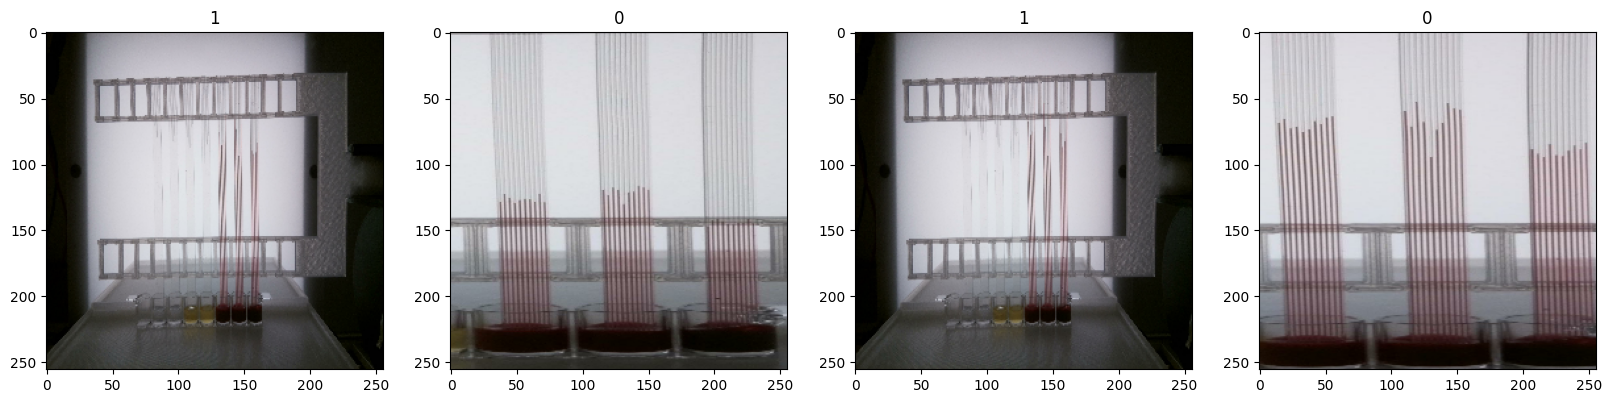

In [11]:
# Plotting the first 4 images of the CapillaryBatch, with a label of the assigned class 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(CapillaryBatch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(CapillaryBatch[1][idx])

In [12]:
#The largest value is less than 255
CapillaryBatch[0].max()

238.3125

In [13]:
# making the value of the batch a variable to be inputted into the CapillaryDataMap
ValueofBatch= CapillaryBatch[0].max()

In [14]:
#Dividing by 255 which is the highest value a pixel can be 
ScaledBatch = CapillaryBatch[0]/ValueofBatch

In [15]:
#The max value will be less than 1 and the min value will be 0, which are more ideal values for the network 
ScaledBatch.max()


1.0

In [16]:
ScaledBatch.min()

0.0

In [17]:
#Map fucntion allows the data to proccessed and transformed without a loop
#Images is represented as x, and are the independant variables based on the image features
#y is the target or dependant variable, which is predicted by changes in x
#After the batch is loaded, divide the image values by 255 (x/255) and no transformation on y
#but because the highest pixel value is not 255, we are dividing by the highest capillary value of the images from the dataset

CapillaryDataMap = CapillaryDataset.map(lambda x,y: (x/ValueofBatch, y)) 

In [18]:
CapillaryDataMap.as_numpy_iterator().next()

2023-04-20 18:23:05.525905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]
2023-04-20 18:23:05.526556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]


(array([[[[5.67027330e-01, 5.37654102e-01, 5.67027330e-01],
          [5.42439342e-01, 5.13066113e-01, 5.42439342e-01],
          [5.54468989e-01, 5.25095761e-01, 5.54468989e-01],
          ...,
          [7.28371859e-01, 7.15783358e-01, 7.45156586e-01],
          [7.28714168e-01, 7.16125667e-01, 7.45498836e-01],
          [7.32971013e-01, 7.20382452e-01, 7.49755681e-01]],
 
         [[5.81897378e-01, 5.52524149e-01, 5.81897378e-01],
          [5.84147632e-01, 5.54774463e-01, 5.84147632e-01],
          [5.80562174e-01, 5.51189005e-01, 5.80562174e-01],
          ...,
          [8.85236382e-01, 8.72647822e-01, 9.02021050e-01],
          [8.77745569e-01, 8.65157008e-01, 8.94530237e-01],
          [8.76999736e-01, 8.64411235e-01, 8.93784404e-01]],
 
         [[8.37906480e-01, 8.08533311e-01, 8.37906480e-01],
          [8.21686804e-01, 7.92313635e-01, 8.21686804e-01],
          [7.90199637e-01, 7.60826468e-01, 7.90199637e-01],
          ...,
          [8.85236382e-01, 8.72647822e-01, 9.0202

In [19]:
# Finding the legnth for the data
len(CapillaryDataMap)

19

In [20]:
TrainingSize = int(len(CapillaryDataMap)*.6)+2 # 413 for training
ValidationSize = int(len(CapillaryDataMap)*.2)+1# 4 for validation
TestingSize = int(len(CapillaryDataMap)*.1)+1# 2 for testing

In [21]:
TrainingSize 

13

In [22]:
ValidationSize

4

In [23]:
TestingSize

2

In [24]:
#Partioning the Data
TrainData = CapillaryDataMap.take(TrainingSize)
#Skipping the 13 batches assigned to Training and 4 for Validation
ValidationData = CapillaryDataMap.skip(TrainingSize).take(ValidationSize)
# Skipping the 17 batches assigned to Training and Validation and 2 batches for Testing
TestingData = CapillaryDataMap.skip(TrainingSize+ValidationSize).take(TestingSize)

In [25]:
#Intstalling the required dependancies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dropout, Dense, MaxPooling2D, Conv2D, Flatten

In [26]:
# adding a convolution and max poooling layer
# adding sequentially so the first layer is the input
# conv has 16 filters that functions in condensing and extracting features from the image
# to make an output classification
#stride of 1 - moves 1 pixel each time wit a 3 by 3 matrix
# acivation is relu, takes output from convolution and any value below 0/not a positive value is set to 0

model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# takes the max value after relu and return the value by a 2,2 region
model.add(MaxPooling2D())

#repeated but with 32 filters
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
 
#repeated with 16 filters
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) #flatten condesnes to a single value

#adding a first dense layer with relu activation
model.add(Dense(32, activation='relu'))

# single output dense layer//either either a full image with components, or cropped images with capillaries as focus 
# tanh activation for binary classification of [-1,1]
model.add(Dense(1, activation='tanh'))


#binary images uses binary_crossentropy for the calculation of the data loss. 
#adam optimizer can iterate over the batches of data
# metrics=['accuracy'] is used to evaluate the perfomance of the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
#Summary of the CNN model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [28]:
# Creating a directory called logs to save log files
logdir='logs'

In [29]:
# Calling back log events to visualise the plots of the e.g. metrics summary
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
#Training the model on 15 epochs. Callbacks to retain the log events for plotting.
hist = model.fit(TrainData, epochs=15, validation_data=ValidationData, callbacks=[tensorboard_callback])

Epoch 1/15


2023-04-20 18:23:22.223533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]
2023-04-20 18:23:22.225161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]


13/13 [==============================] - ETA: 0s - loss: 0.6079 - accuracy: 0.7115

2023-04-20 18:24:29.824444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [600]
	 [[{{node Placeholder/_0}}]]
2023-04-20 18:24:29.828754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]


13/13 [==============================] - 106s 7s/step - loss: 0.6079 - accuracy: 0.7115 - val_loss: 0.0537 - val_accuracy: 1.0000
Epoch 2/15
13/13 [==============================] - 113s 7s/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 3/15
13/13 [==============================] - 98s 6s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 6.7213e-04 - val_accuracy: 1.0000
Epoch 4/15
13/13 [==============================] - 80s 5s/step - loss: 1.4240e-04 - accuracy: 1.0000 - val_loss: 7.5102e-06 - val_accuracy: 1.0000
Epoch 5/15
13/13 [==============================] - 80s 5s/step - loss: 3.6464e-06 - accuracy: 1.0000 - val_loss: 9.3039e-07 - val_accuracy: 1.0000
Epoch 6/15
13/13 [==============================] - 78s 5s/step - loss: 5.3001e-05 - accuracy: 1.0000 - val_loss: 5.2681e-06 - val_accuracy: 1.0000
Epoch 7/15
13/13 [==============================] - 70s 4s/step - loss: 2.8799e-05 - accuracy: 1.0000 - val_loss: 5.6412e-05 - val_accuracy: 

In [31]:
#Seeing the values of training loss, training accuracy, validation loss and validation accuracy of the trained model
hist.history

{'loss': [0.6078835129737854,
  0.02279401756823063,
  0.005179969128221273,
  0.00014239976007957011,
  3.6463598007685505e-06,
  5.3000538173364475e-05,
  2.8799202482332475e-05,
  6.398007099051028e-05,
  2.2670083126286045e-05,
  2.414855316601461e-06,
  5.221140213507169e-07,
  2.3297396012367244e-07,
  1.5202051883989043e-07,
  1.1577056824307874e-07,
  1.0015300233590096e-07],
 'accuracy': [0.7115384340286255,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.053690992295742035,
  0.003804470645263791,
  0.0006721282843500376,
  7.510241630370729e-06,
  9.303919910053082e-07,
  5.268052518658806e-06,
  5.641185998683795e-05,
  4.870860720984638e-05,
  5.228473582974402e-06,
  9.736986612551846e-07,
  3.185123773619125e-07,
  1.8021094660980452e-07,
  1.4342370491249312e-07,
  1.0570512642971153e-07,
  8.242206206432456e-08],
 'val_accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0

In [32]:
#Plotting the Data

In [33]:
#intsalling required dependancies 
import numpy as np 

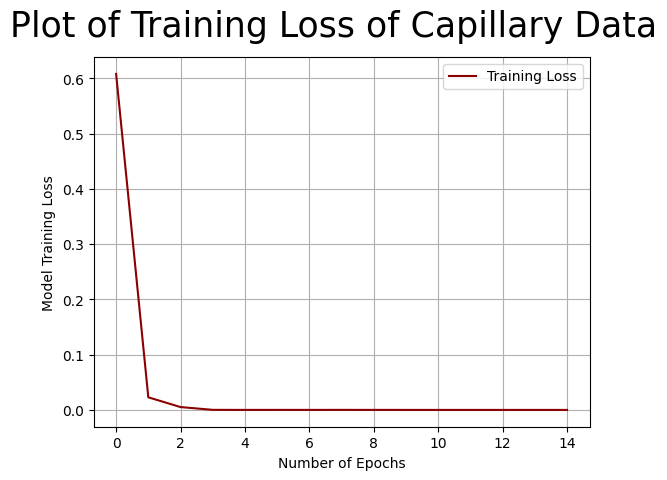

In [34]:
# Plotting Training Loss of the Capillary Data
fig = plt.figure()
plt.plot(hist.history['loss'], label='Training Loss', color='darkred')
fig.suptitle('Plot of Training Loss of Capillary Data', fontsize=25)
plt.xlabel("Number of Epochs")
plt.ylabel("Model Training Loss")
plt.grid()
plt.legend(loc="upper right")
plt.show()

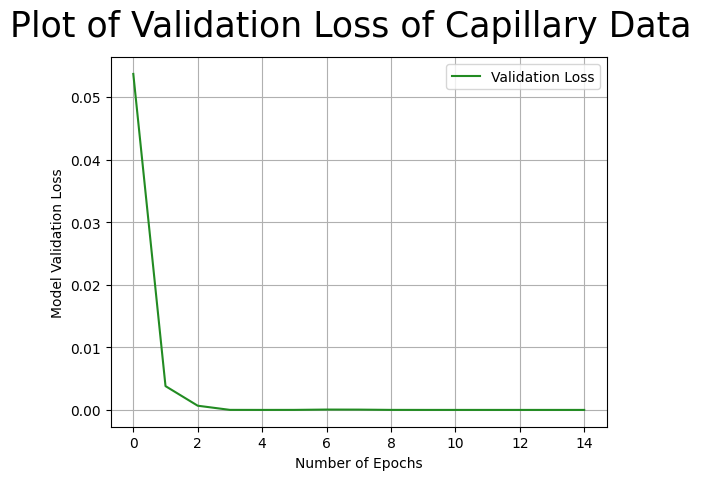

In [35]:
# Plotting Validation Loss of the Capillary Data
fig = plt.figure()
plt.plot(hist.history['val_loss'], label='Validation Loss', color='forestgreen')
fig.suptitle('Plot of Validation Loss of Capillary Data', fontsize=25)
plt.ylabel("Model Validation Loss")
plt.xlabel("Number of Epochs")
plt.grid()
plt.legend(loc="upper right")
plt.show()

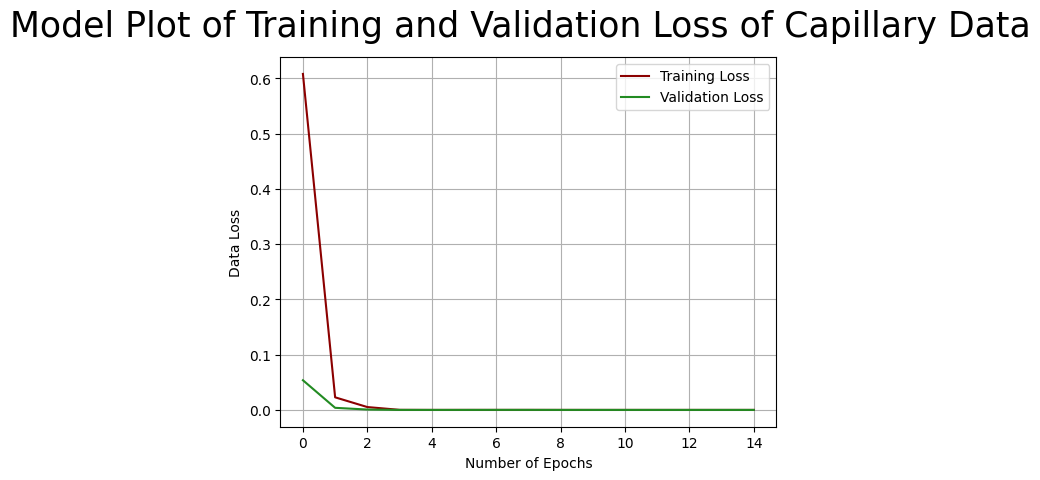

In [36]:
# Plotting both the Training and Validation Loss of the Capillary Data
fig = plt.figure()
plt.plot(hist.history['loss'], label='Training Loss', color='darkred')
plt.plot(hist.history['val_loss'], label='Validation Loss', color='forestgreen',)
fig.suptitle('Model Plot of Training and Validation Loss of Capillary Data', fontsize=25)
plt.xlabel("Number of Epochs")
plt.ylabel("Data Loss")
plt.grid()
plt.legend(loc="upper right")
plt.show()

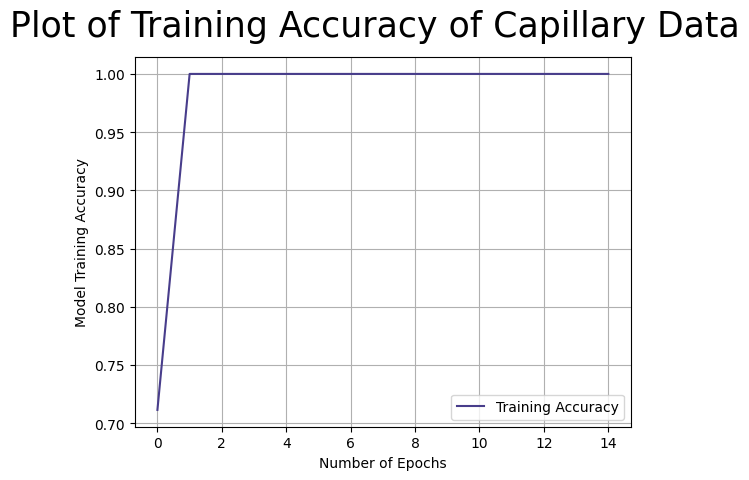

In [37]:
# Plotting the Training Accuracy of the Capillary Data
fig = plt.figure()
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='darkslateblue')
fig.suptitle('Plot of Training Accuracy of Capillary Data', fontsize=25)
plt.xlabel("Number of Epochs")
plt.ylabel("Model Training Accuracy")
plt.grid()
plt.legend(loc="lower right")
plt.show()

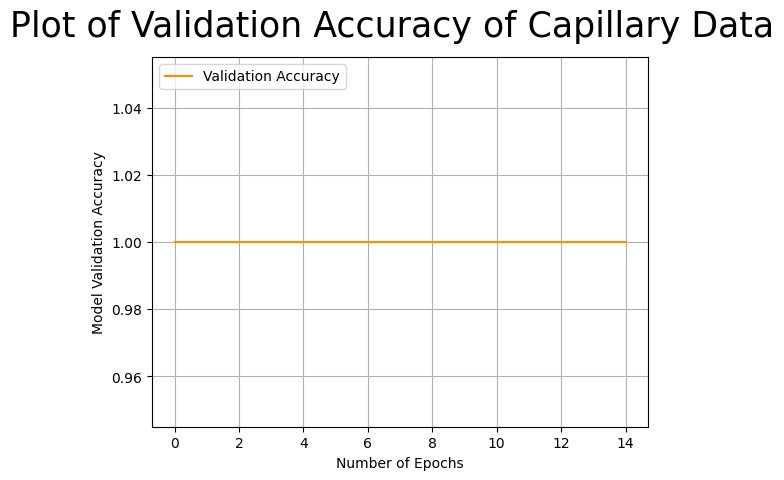

In [38]:
# Plotting the Validation Accuracy of the Capillary Data
fig = plt.figure()
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='darkorange',)
fig.suptitle('Plot of Validation Accuracy of Capillary Data', fontsize=25)
plt.xlabel("Number of Epochs")
plt.ylabel("Model Validation Accuracy")
plt.grid()
plt.legend(loc="upper left")
plt.show()

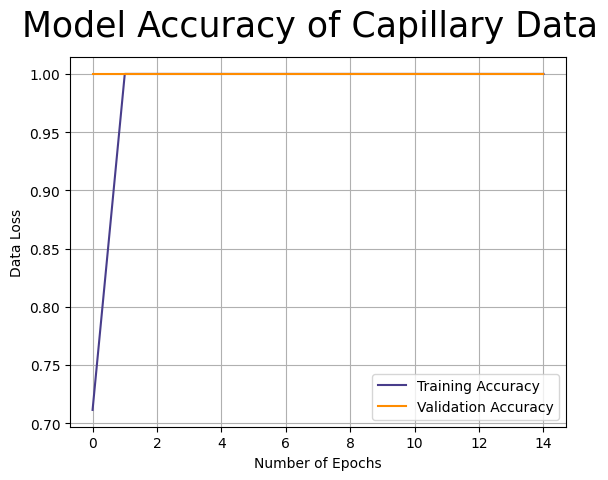

In [39]:
# Plotting both the Training and Validation Accuracy of the Capillary Data
fig = plt.figure()
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='darkslateblue')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='darkorange',)
fig.suptitle('Model Accuracy of Capillary Data', fontsize=25)
plt.xlabel("Number of Epochs")
plt.ylabel("Data Loss")
plt.grid()
plt.legend(loc="lower right")
plt.show()

In [40]:
#Evaluating the Model 

In [41]:
#installing dependancies that are used for classification 
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
CapillaryPrecision = Precision()  #computes the precision of predicaitons to the labelled image
CapillaryRecall = Recall() #computes the recall of predicaitons to the labelled image
CapillaryAccuacy = BinaryAccuracy()# computes how often the labels match the preictions 

In [43]:
# assgined 2 batches to testing
len(TestingData)

2

In [44]:
# Loop through the 2 batches of the testing data
for batch in TestingData.as_numpy_iterator(): 
    X, y = CapillaryBatch #images and true values
    yhat = model.predict(X) # making predicitons and return values [-1,1] because we have tanh acttivation
    CapillaryPrecision.update_state(y, yhat) #updating metrics that pass through the y true value and yhat model predictioon value
    CapillaryRecall.update_state(y, yhat)
    CapillaryAccuacy.update_state(y, yhat)

2023-04-20 18:39:52.391140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]
2023-04-20 18:39:52.392361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 305ms/step


In [45]:
#print out result of the metrics, values are between 0 and 1. 
print(f'Test Data Metrics: Precision:{CapillaryPrecision.result().numpy()}, Recall:{CapillaryRecall.result().numpy()}, Accuracy:{CapillaryAccuacy.result().numpy()}')

Test Data Metrics: Precision:1.0, Recall:1.0, Accuracy:1.0


In [46]:
#Testing the Model 
import cv2

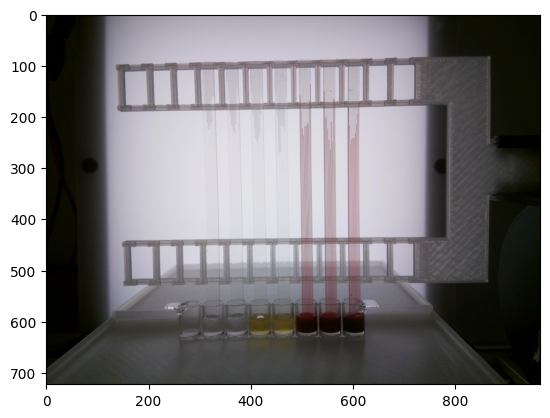

In [48]:
#testing with an unknwon image and can be seen below
img = cv2.imread('TestingImages/SimilarImage1.jpeg') 
#List of test image names- copy and paste into img  
#SimilarImage1.jpeg/SimilarImage2.jpeg
#NewImageCropped1.jpeg/NewImage2.jpeg
#RotatedImage1.jpeg/RotatedImage2.jpeg/RotatedImage3.jpeg/RotatedImage4.jpeg/RotatedImage5.jpeg
#PartialRoation,jpeg/Edited.jpeg

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #showing in RGB and not BGR
resize = tf.image.resize(img, (256,256))

In [49]:
#passing this image through the model
#np.expand_dims allows the single image to be passed through by outting it through another set of arrays
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 143ms/step


In [50]:
#<0 is going to be capillaries only and >0 is cappillaries and components
#value should range between -1 to 1
yhat

array([[0.9998845]], dtype=float32)

Capillaries & Components 


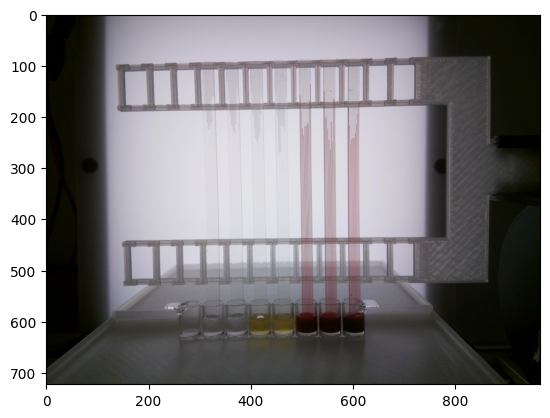

In [51]:
#if the predicted value of yhat is equal to 0 or less than it will print out capillaries and anything higher than 0 is capillaries and components
if yhat  <= 0: 
    print('Capillaries')
else:
    print('Capillaries & Components ')
resize = tf.image.resize(img, (255,255))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),(resize.numpy().astype(int))
plt.show()